## Contribution 
Zhou ze rui ()


## Topic : relationship between Japan's real estate market and Japanese population
## Country : Japan 
# brief background : 
Over the past 50 years, with the transformation of the labor force's demographic structure, the real estate prices have also undergone cyclical changes.The prices of real estate in Japan have exhibited a typical two-phase cycle of upward and downward trends and the change of the population , in terms of  distribution and total population , plays an important role in it.



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
pop = pd.read_csv("inverse.csv")
name_ch = {"Population, total":"pop_total"}
pop = pop.rename(columns = name_ch)


In [3]:
pop.dropna(inplace=True)
new_column_names = {'Indicator Name': 'year'}
pop.rename(columns=new_column_names, inplace=True)
pop_age_dis = pop[["year","Population ages 15-64 (% of total population)",
                                         "Population ages 0-14 (% of total population)",
                                         "Population ages 65 and above (% of total population)",
                                         "Population ages 0-14, total",
                                         "Population ages 15-64, total",
                                         "Population ages 65 and above, total"]]
names = {"Population ages 15-64 (% of total population)": "Age_15-64_per",
         "Population ages 0-14 (% of total population)": "Age_0-14_per",
         "Population ages 65 and above (% of total population)": "Age_65+_per",
         "Population ages 0-14, total": "Age_0-14",
         "Population ages 15-64, total": "Age_15-64",
         "Population ages 65 and above, total": "Age_65+"}
pop_age_dis = pop_age_dis.rename(columns = names)
pop_age_dis = pop_age_dis.loc[pop_age_dis["year"] > 2006]
pop_age_dis["ratio_pc"] = pop_age_dis["Age_15-64"] /( pop_age_dis["Age_0-14"] + pop_age_dis["Age_65+"]) # 
pop_age_dis

,year,Age_15-64_per,Age_0-14_per,Age_65+_per,Age_0-14,Age_15-64,Age_65+,ratio_pc
47,2007,64.595352,13.463916,21.940732,17233947,82682697,28084356,1.824488
48,2008,64.028588,13.389656,22.581756,17147195,81996931,28918875,1.779985
49,2009,63.535944,13.298166,23.165890,17027903,81355870,29663227,1.742427
50,2010,63.199072,13.200393,23.600535,16905743,80939051,30225206,1.717323
51,2011,62.914430,13.107790,23.977780,16756081,80425404,30651515,1.696467
52,2012,62.347024,13.005524,24.647452,16598820,79572883,31457297,1.655833
53,2013,61.516329,12.902182,25.581488,16443186,78399486,32602328,1.598505
54,2014,60.679080,12.793935,26.526985,16283609,77229906,33762485,1.543175
55,2015,59.998318,12.673482,27.328200,16113192,76282461,34745347,1.499895
56,2016,59.508994,12.545086,27.945920,15941793,75621650,35512557,1.469684


<Axes: xlabel='year'>

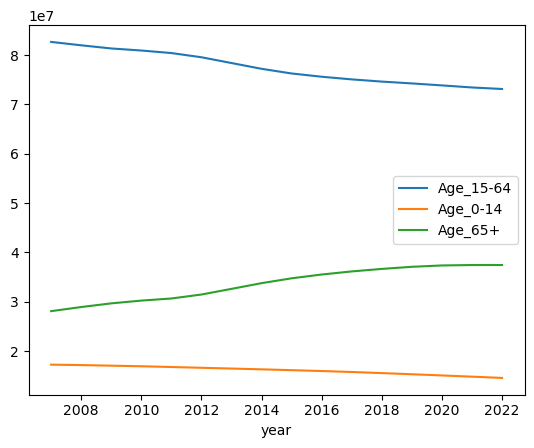

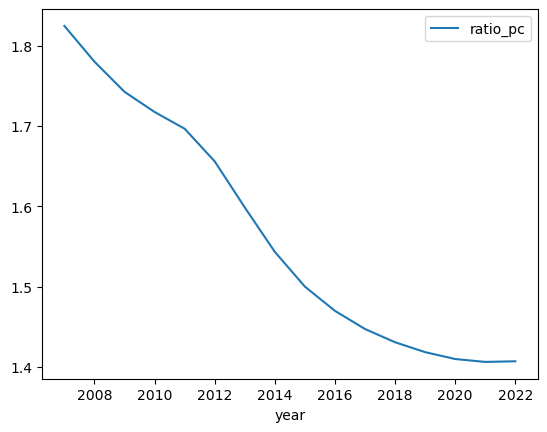

In [4]:
# plot population distribution
pop_age_dis.plot(x="year",y=["Age_15-64","Age_0-14","Age_65+"])
pop_age_dis.plot(x="year",y="ratio_pc") 
# this ration reflect the A higher producer-to-consumer ratio, 
# greater than 1, indicates higher societal productivity and a smaller dependency burden, 
# resulting in a more significant demographic dividend. 

# Why choose the ratio
For the real estate sector, the key population group is the working-age population, and the core demographic indicator we focus on is the producer-to-consumer ratio. The working-age population generally refers to the population between 15 and 64 years old. We define the population aged between 15 and 64 as producers (also known as the labor force), and those aged below 15 and above 65 as consumers (also known as dependents). A higher producer-to-consumer ratio, greater than 1, indicates higher societal productivity and a smaller dependency burden, resulting in a more significant demographic dividend. Conversely, a lower producer-to-consumer ratio implies a smaller demographic dividend. Based on the experiences of various countries after World War II, a producer-to-consumer ratio lower than 2 often leads to a population burden, with the dependency ratio exceeding 50%.

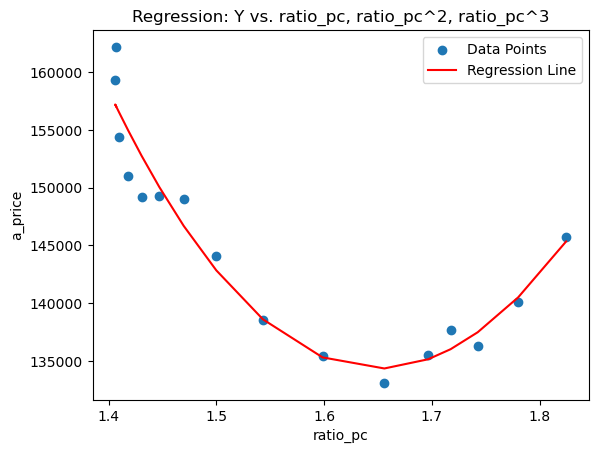

In [5]:

import statsmodels.api as sm
est_p = pd.read_csv("average_per_year.csv")
# 假设有一个DataFrame df，包含X和Y列
# df = pd.DataFrame({'X': [x_value1, x_value2, ...], 'Y': [y_value1, y_value2, ...]})
df = pd.merge(est_p,pop_age_dis,on="year")
# 添加X的平方和X的三次方列
df['ratio_pc_squared'] = df['ratio_pc'] ** 2
df['ratio_pc_cubed'] = df['ratio_pc'] ** 3

# 添加常数列（用于拟合截距）
df['constant'] = 1

# 定义自变量X、X的平方和X的三次方，以及常数列（截距）
X = df[['ratio_pc', 'ratio_pc_squared', 'ratio_pc_cubed', 'constant']]
y = df['a_price']

# 使用最小二乘法进行回归
model = sm.OLS(y, X).fit()

# 绘制散点图
plt.scatter(df['ratio_pc'], df['a_price'], label='Data Points')

# 绘制回归拟合曲线
X_pred = pd.DataFrame({'ratio_pc': df['ratio_pc']})
X_pred['ratio_pc_squared'] = X_pred['ratio_pc'] ** 2
X_pred['ratio_pc_cubed'] = X_pred['ratio_pc'] ** 3
X_pred['constant'] = 1
y_pred = model.predict(X_pred)
plt.plot(df['ratio_pc'], y_pred, color='red', label='Regression Line')

# 设置图表标题和标签
plt.title('Regression: Y vs. ratio_pc, ratio_pc^2, ratio_pc^3')
plt.xlabel('ratio_pc')
plt.ylabel('a_price')

# 显示图例
plt.legend()

# 显示图表
plt.show()


# ratio of p/c and average estate price 
We calculated the population dividend rate annually and conducted regression analyses using its square and cubic terms to evaluate their impact on housing prices. The results show that they can explain housing price variations quite well

特征重要性：
[1.]


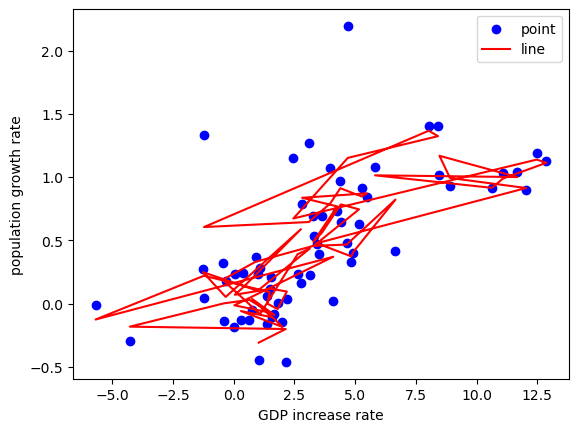

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# 读取GDP增长率数据
gdp_data = pd.read_csv('GDP and Iflation.csv')  # 替换为实际文件路径

# 读取人口增长率数据
population_data = pd.read_csv('inverse.csv')  # 替换为实际文件路径

# 合并数据，基于共同的列（例如'Year'）
merged_data = pd.merge(gdp_data, population_data, on='year')
merged_data.fillna(merged_data.mean(), inplace=True)
# 准备回归所需的数据
X = merged_data[['GDP growth (annual %)']].values
y = merged_data['Population growth (annual %)'].values

# 创建并拟合线性回归模型
model = RandomForestRegressor(n_estimators=10, random_state=40)
model.fit(X, y)

# 获取回归结果
feature_importance = model.feature_importances_

print("特征重要性：")
print(feature_importance)

# 可视化回归线
plt.scatter(X, y, color='blue', label='point')
plt.plot(X, model.predict(X), color='red', label='line')
plt.xlabel('GDP increase rate')
plt.ylabel('population growth rate')
plt.legend()
plt.show()


R平方 (R-squared): 0.5063911412318547


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

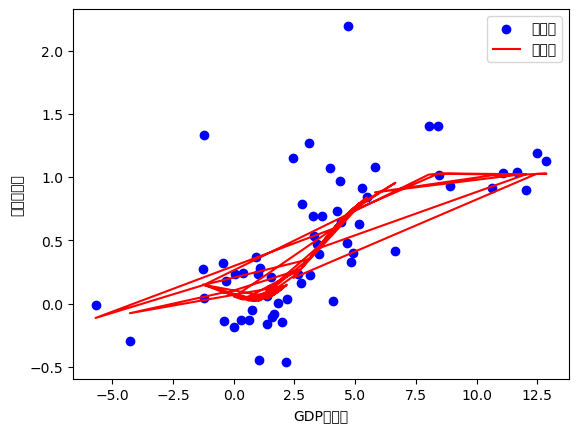

In [7]:
# 读取GDP增长率数据
gdp_data = pd.read_csv('GDP and Iflation.csv')  # 替换为实际文件路径

# 读取人口增长率数据
population_data = pd.read_csv('inverse.csv')  # 替换为实际文件路径

# 合并数据，基于共同的列（例如'Year'）
merged_data = pd.merge(gdp_data, population_data, on='year')
merged_data.fillna(merged_data.mean(), inplace=True)
# 准备回归所需的数据
X = merged_data[['GDP growth (annual %)']].values
y = merged_data['Population growth (annual %)'].values

# 创建并拟合SVR模型
model = SVR(kernel='rbf')  # 使用高斯径向基函数（RBF）作为核函数，以支持非线性回归
model.fit(X, y)

# 获取回归结果
r_squared = model.score(X, y)

print(f"R平方 (R-squared): {r_squared}")

# 可视化回归线
plt.scatter(X, y, color='blue', label='数据点')
plt.plot(X, model.predict(X), color='red', label='回归线')
plt.xlabel('GDP增长率')
plt.ylabel('人口增长率')
plt.legend()
plt.show()